## t-SNE on MNIST dataset

## Homework

- Apply t-SNE to visualize the MNIST dataset (handwritten image) at the end of the notebook

  - Tune your t-SNE to get the best visualization
  - Report your hyperparameters
  - Also report your tuning procedure

## Note
1. You may need to adjust relevant hyperparameters of the t-SNE to get beautiful results. (it should clearly clump digits of the same kind together)

2. Write a report as a PDF including all necessary results and explanations. / How did you get the beautiful results.

3. Submit your google colab link

**Write a report as a PDF (including screen shots if needed).**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
print('X:', X.shape)
print('y:', y.shape)

X: (70000, 784)
y: (70000,)


### Samples from MNIST

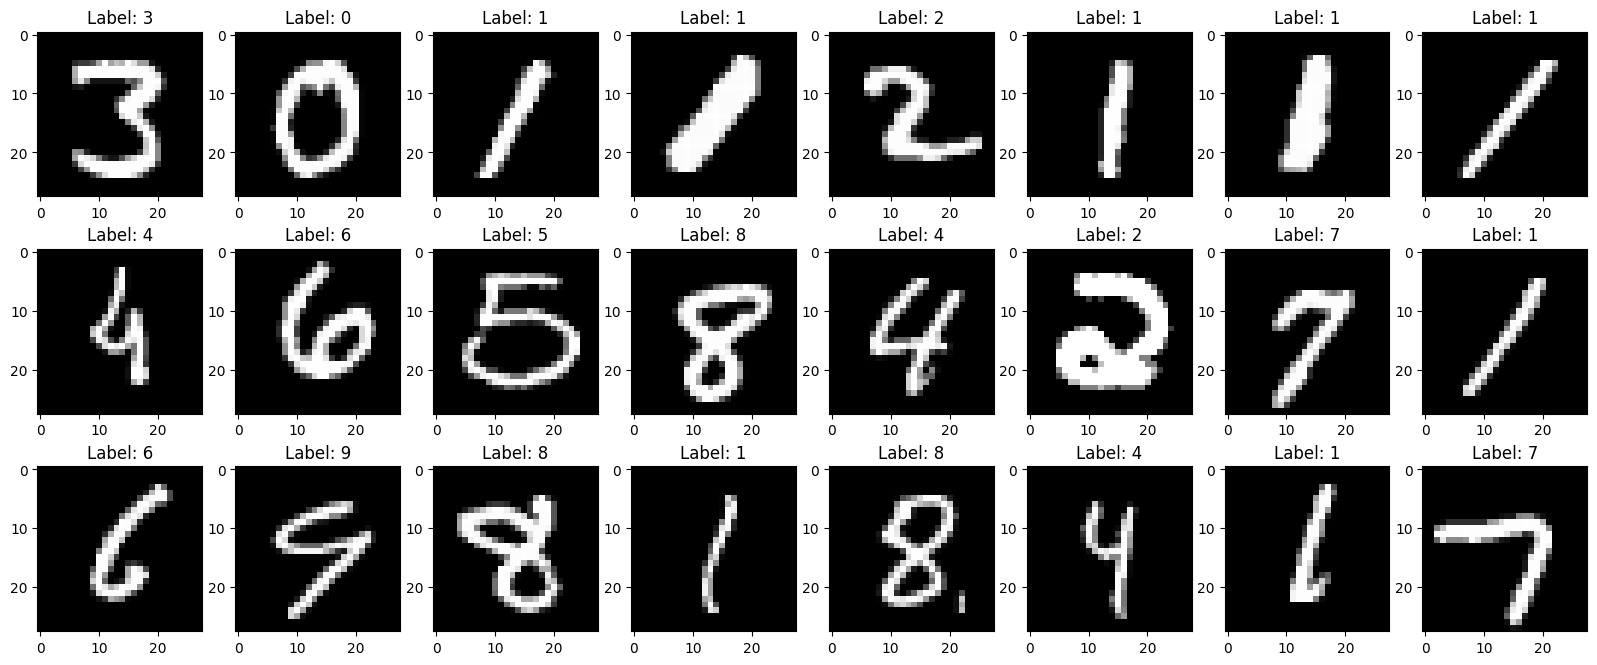

In [ ]:
idx = np.random.choice(len(X), 24)
fig, ax = plt.subplots(3, 8, figsize=(20, 8))
ax = [*ax[0], *ax[1], *ax[2]]
for i in range(len(idx)):
  img = X[idx[i]].reshape(28, 28)
  ax[i].set_title(f'Label: {y[idx[i]]}')
  ax[i].imshow(img, cmap='gray')

## Selecting a small subset from the MNIST (t-SNE is too slow)

In [ ]:
n = 3000
np.random.seed(42)
idx = np.random.choice(len(X), n)
Xs = X[idx]
ys = np.array([int(i) for i in y[idx]])
print('X:', Xs.shape)
print('Y:', ys.shape)
print(ys[:3])

X: (3000, 784)
Y: (3000,)
[0 0 1]


## Naively using PCA

from inclass [Link](https://colab.research.google.com/drive/1TxbIJ0S9XLEoGGlDUymZmrfuliLtZuXF?usp=sharing#scrollTo=vuqHM3ZxITY6)

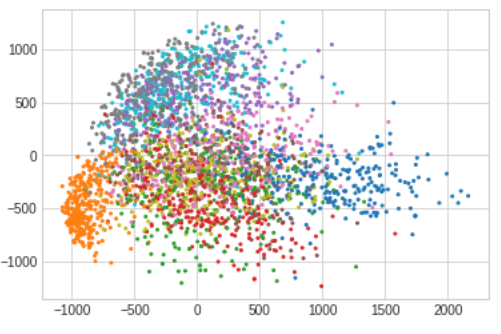

## t-SNE (Tasks)

### Evalute the t-SNE with Kmeans
idea: Iterate perplexity and evaluate with Kmean clustering

In [ ]:
# Tune t-SNE to get the best visualization
# Standardize the data
scaler = StandardScaler()
_Xs = scaler.fit_transform(Xs)

_Xs.shape

(3000, 784)

> **Screen data with PCA to improve speed calculation and help tSNE not hard working :_(**

In [ ]:
# Screen data with PCA to improve speed calculation and help tSNE not hard working :_(
pca = PCA(n_components = 30, random_state = 42)
X_pca = pca.fit_transform(_Xs)

In [ ]:
X_pca

array([[ 10.95175452, -12.6588997 ,  -1.2136629 , ...,  -2.82852264,
         -1.19073437,  -0.38413446],
       [ 10.91524716,  -7.71538318,  -4.86683985, ...,  -1.34826743,
         -1.91604642,   2.008021  ],
       [ -8.23162413,  -2.18480345,   1.36968849, ...,  -1.38750217,
         -0.91134847,   1.02911916],
       ...,
       [ -6.08132055,  -4.75726751,   2.64407297, ...,   0.22585271,
          0.72289422,  -0.01285297],
       [ -7.69361186,  -1.04792161,  -2.0585678 , ...,   2.56876972,
         -0.53359305,  -1.66180173],
       [  3.14515528,  -6.05209127,  -1.11882214, ...,  -1.64573754,
         -0.19240774,   0.95451674]])



> **model = TSNE(n_components = 2, perplexity = perplexity, random_state = 42, learning_rate = 1000, max_iter = 3000)**



In [ ]:
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])

Trying perplexity: 20


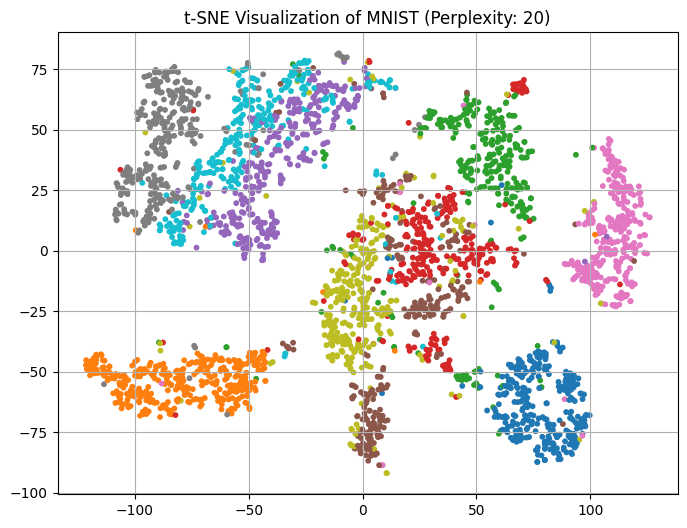

Trying perplexity: 21


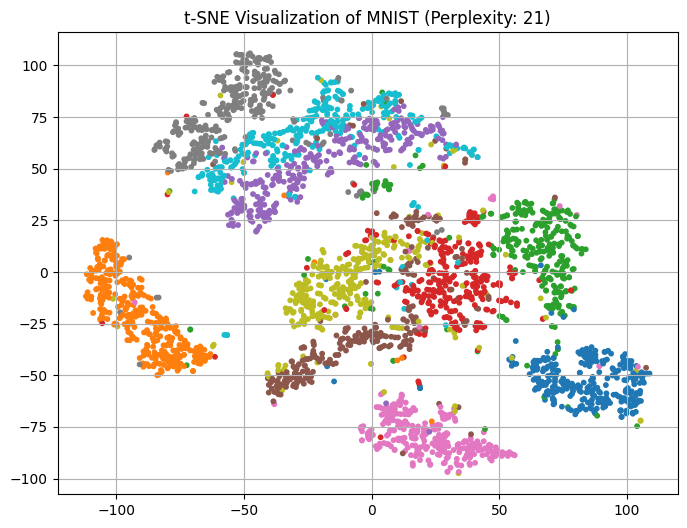

Trying perplexity: 22


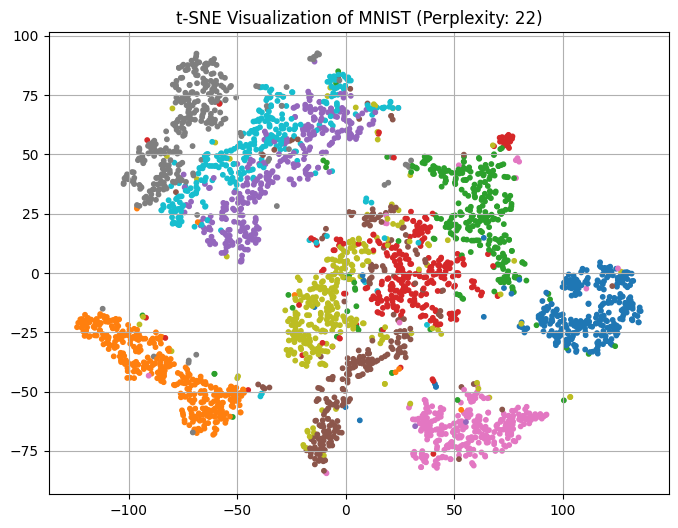

Trying perplexity: 23


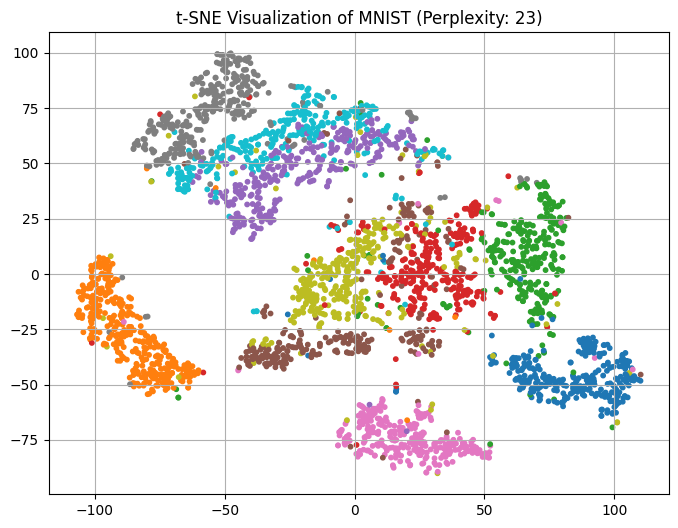

Trying perplexity: 24


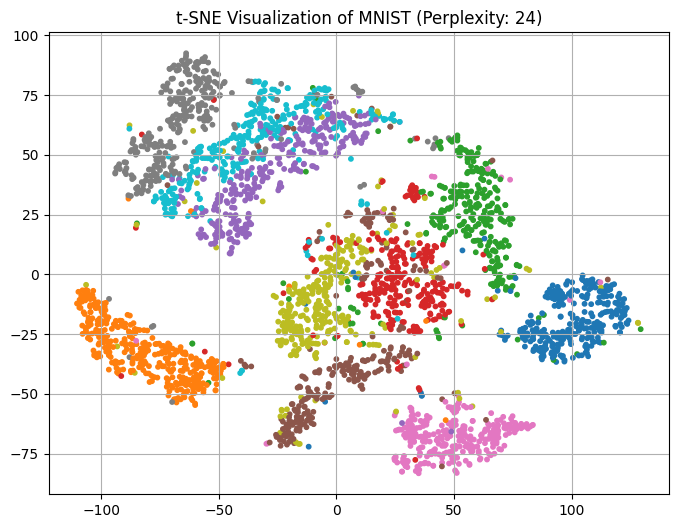

Trying perplexity: 25


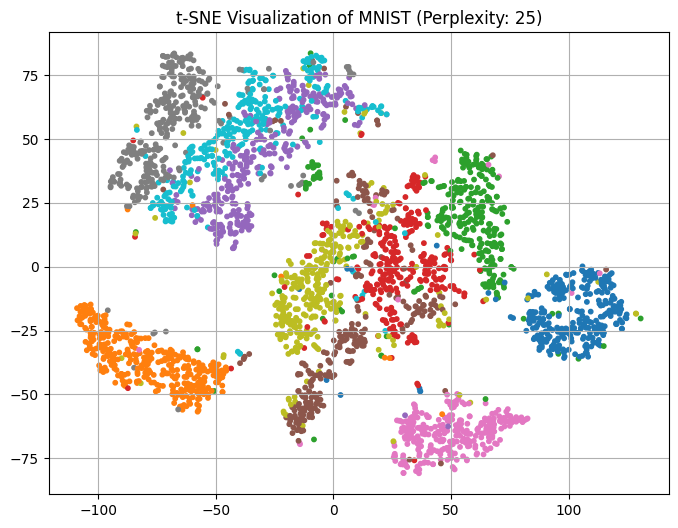

Trying perplexity: 26


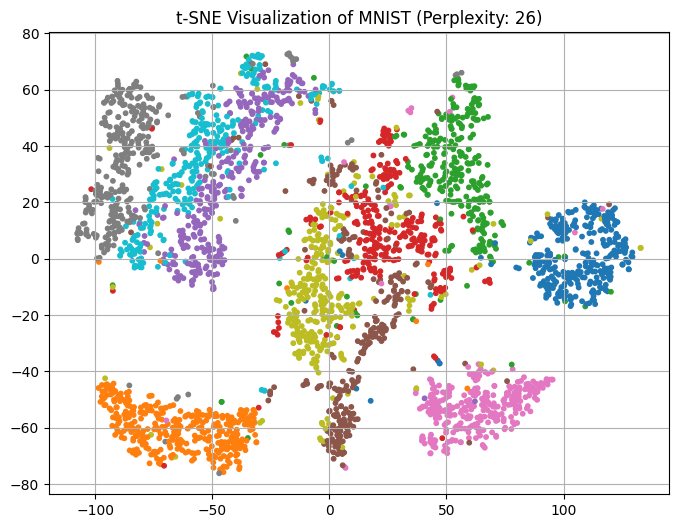

Trying perplexity: 27


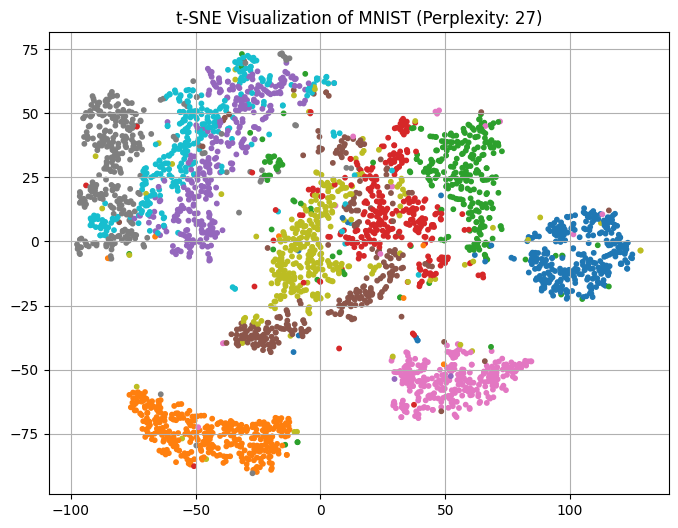

Trying perplexity: 28


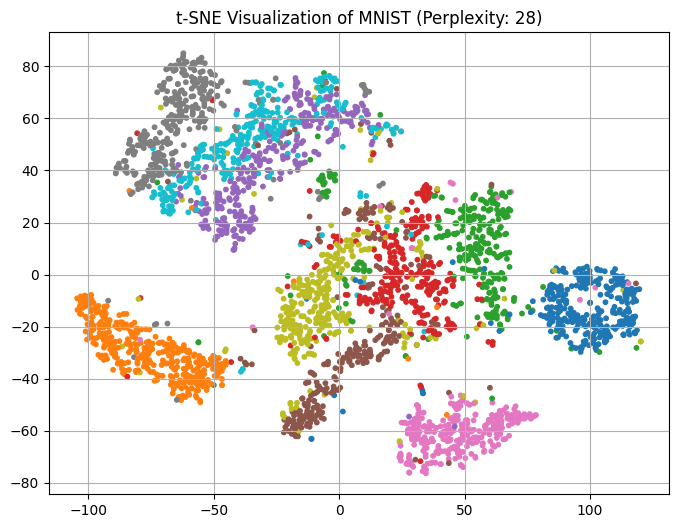

Trying perplexity: 29


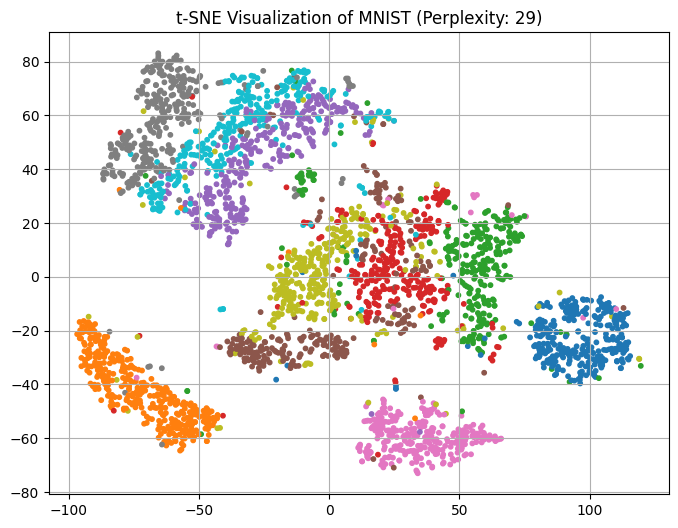

Trying perplexity: 30


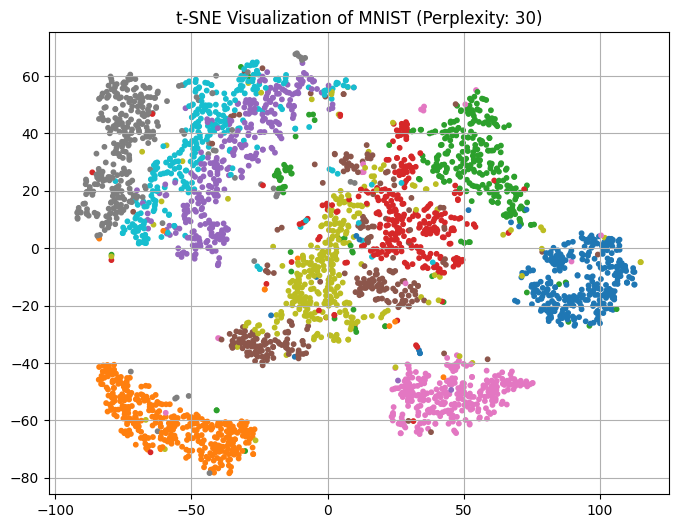

Trying perplexity: 31


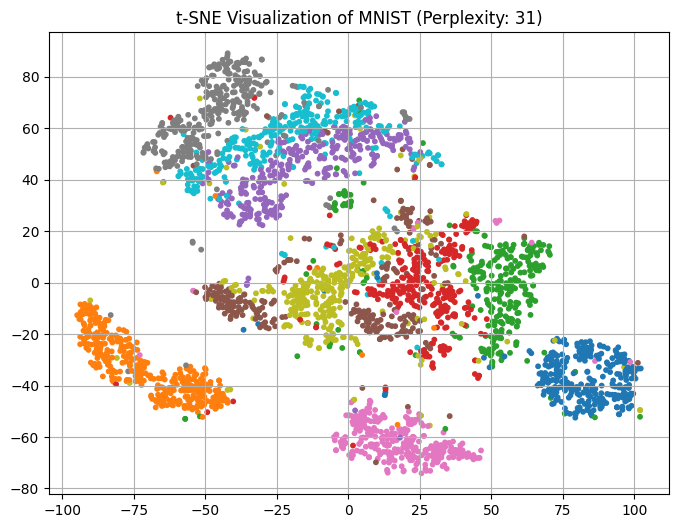

Trying perplexity: 32


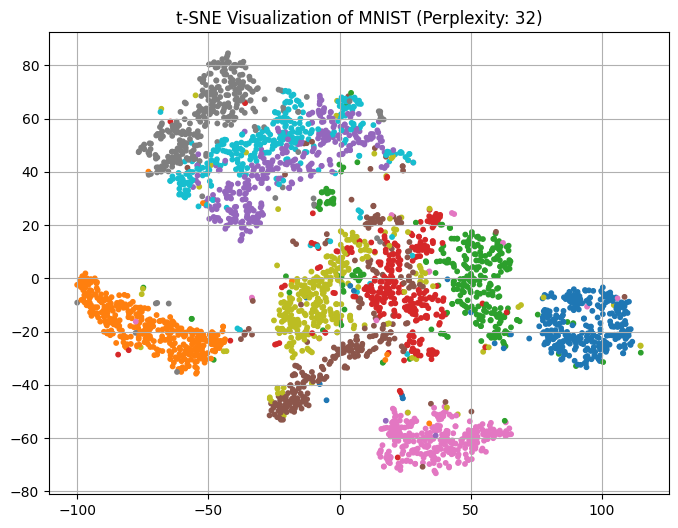

Trying perplexity: 33


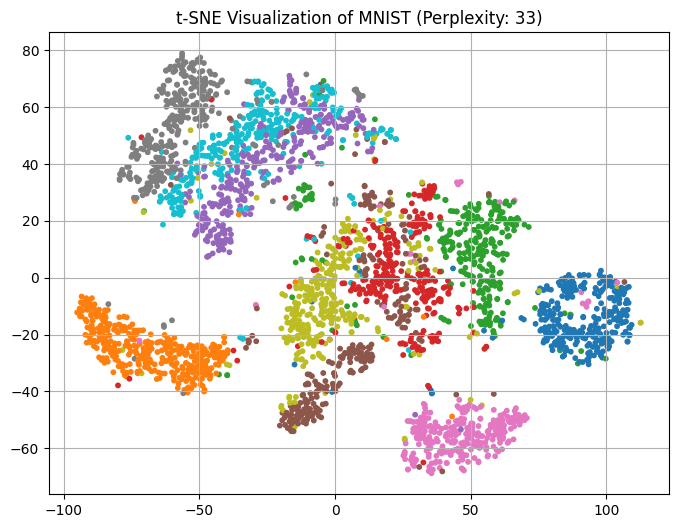

Trying perplexity: 34


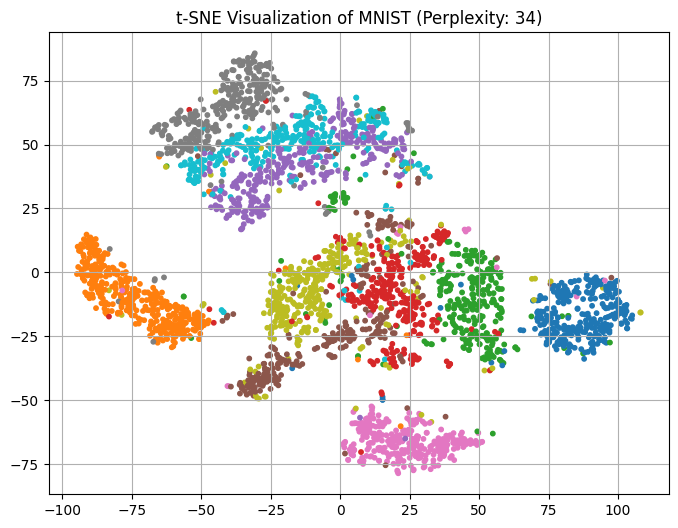

Trying perplexity: 35


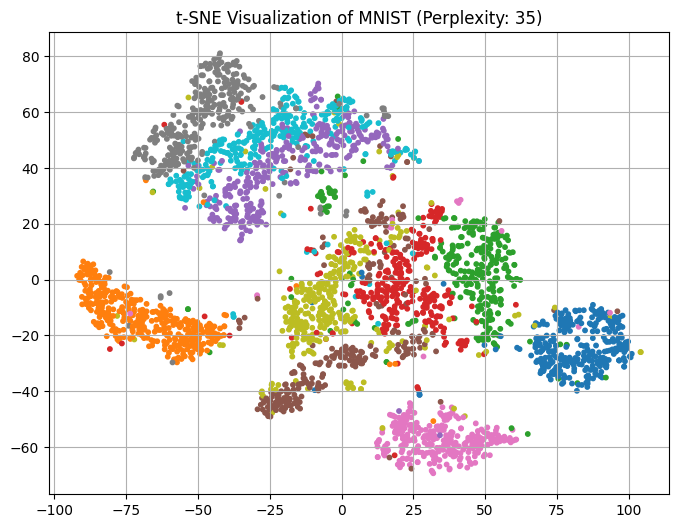

Trying perplexity: 40


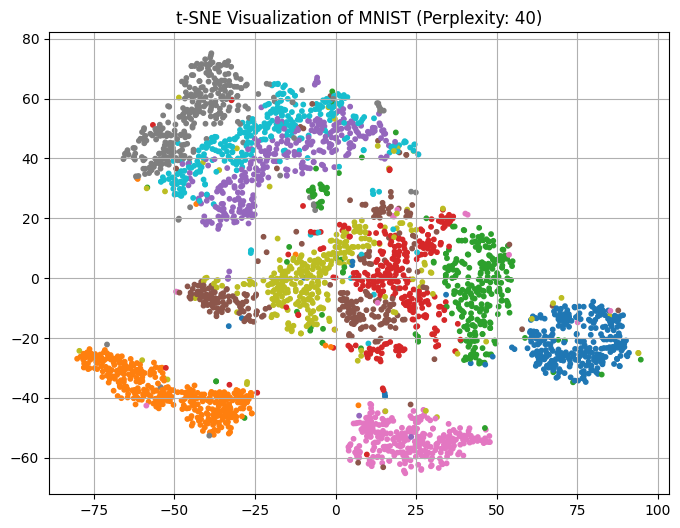

Trying perplexity: 42


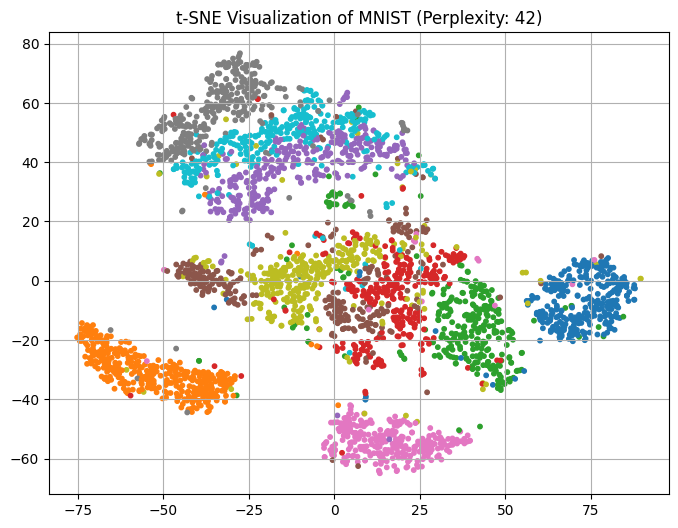

Trying perplexity: 43


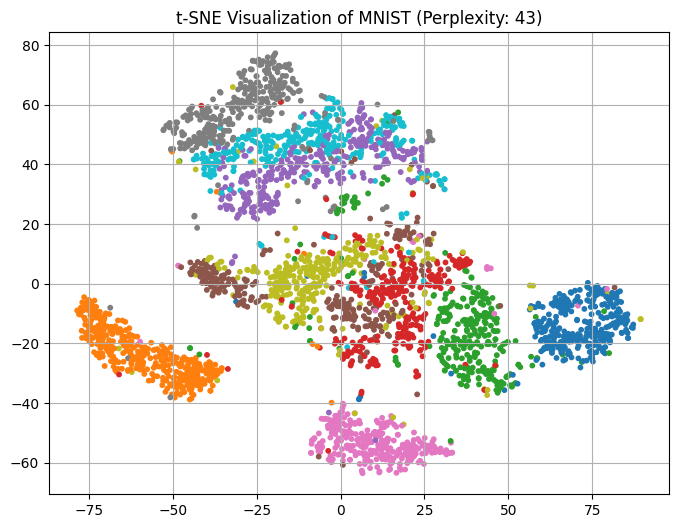

Trying perplexity: 45


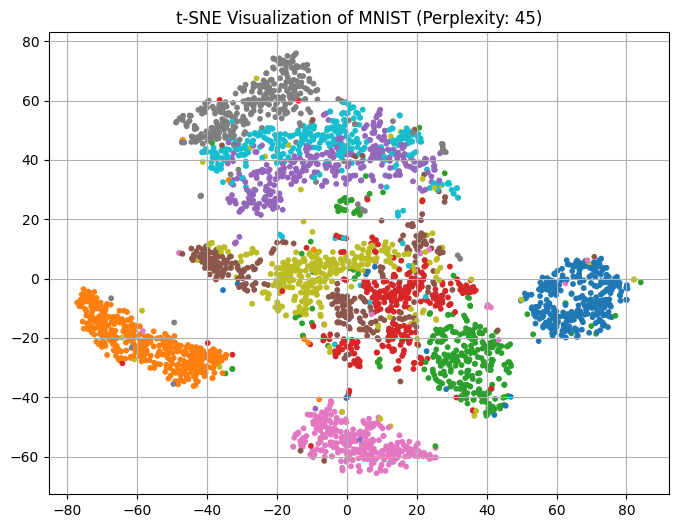

Trying perplexity: 48


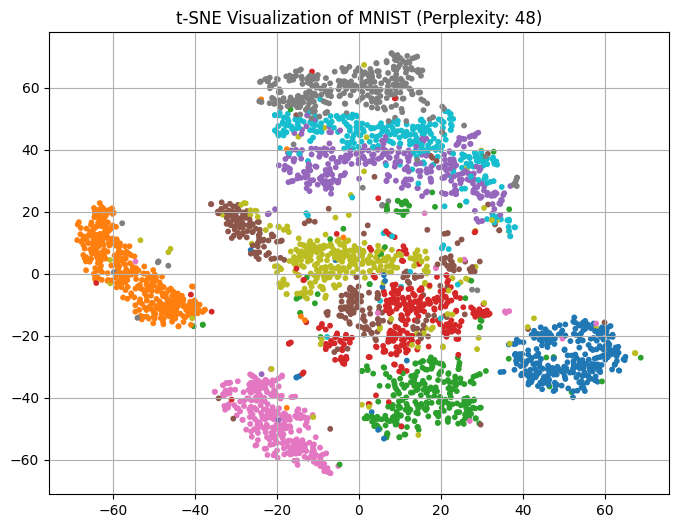

Trying perplexity: 50


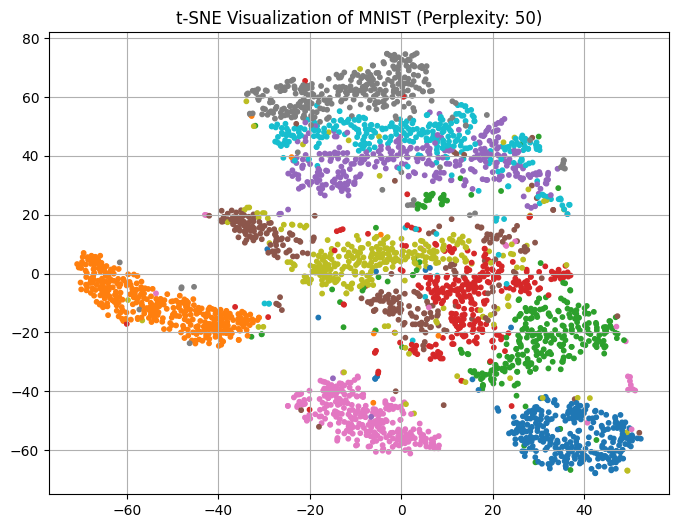

#-----------------------------------------------------------------------------
Best perplexity found: 48
The change of perplexity


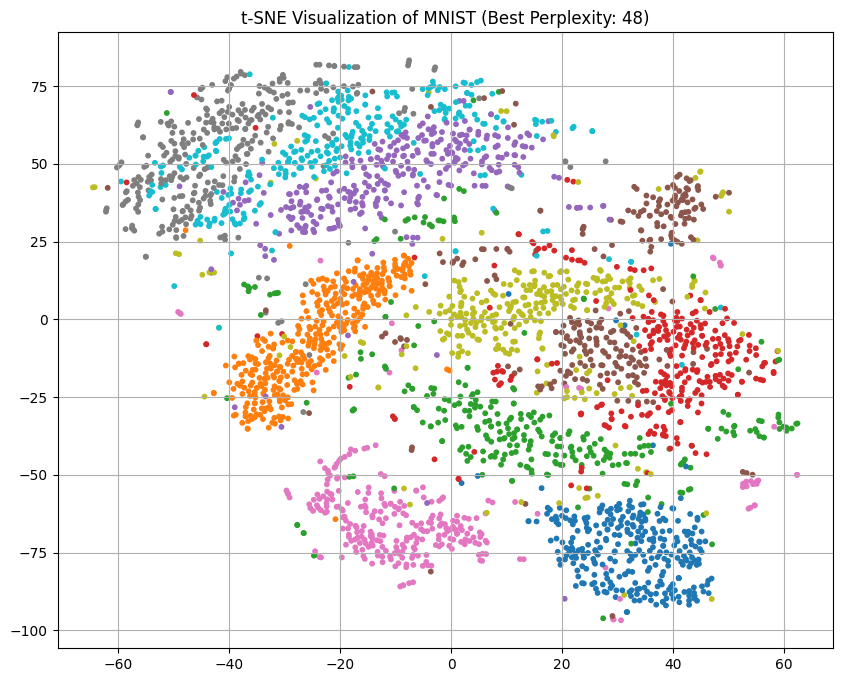

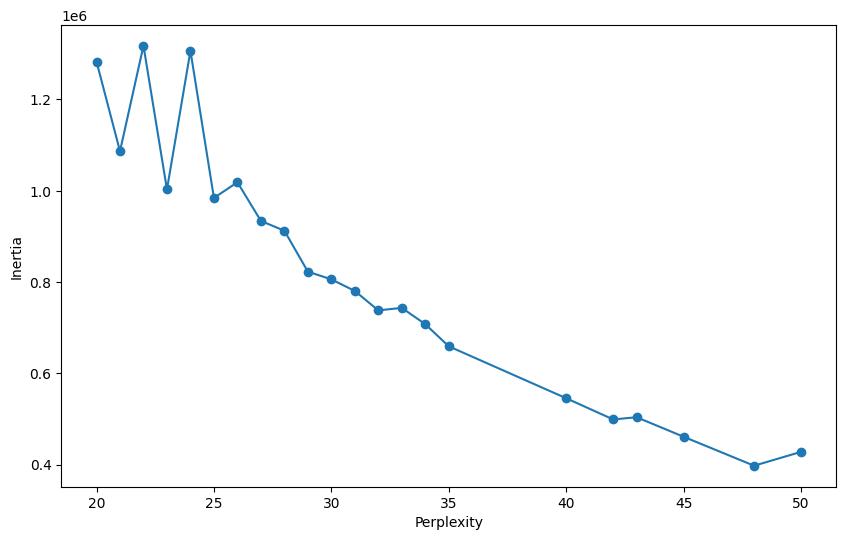

In [ ]:
from sklearn.cluster import KMeans
# Iterate through perplexity values and evaluate perplexity
best_perplexity = None
min_perplexity_score = float('inf')
perplexity_score_list = {}
perplexity_values = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 42, 43, 45, 48, 50]

for perplexity in perplexity_values:
    print(f"Trying perplexity: {perplexity}")
    model = TSNE(n_components = 2, perplexity = perplexity, random_state = 42, learning_rate = 1000, max_iter = 3000)
    _X = model.fit_transform(X_pca)

    # Evaluate perplexity with minimize kmeans.interia_
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(_X)
    perplexity_score = kmeans.inertia_

    if perplexity_score < min_perplexity_score:
        min_perplexity_score = perplexity_score
        best_perplexity = perplexity

    perplexity_score_list[perplexity] = perplexity_score
    plt.figure(figsize=(8, 6))
    plt.scatter(_X[:, 0], _X[:, 1], c=colors[ys], s=10)
    plt.title(f"t-SNE Visualization of MNIST (Perplexity: {perplexity})")
    plt.grid(True)
    plt.savefig(f'tsne_mnist_{perplexity}.png')
    plt.show()

## Best Perplexity

#-----------------------------------------------------------------------------
Best perplexity found: 48
The change of perplexity


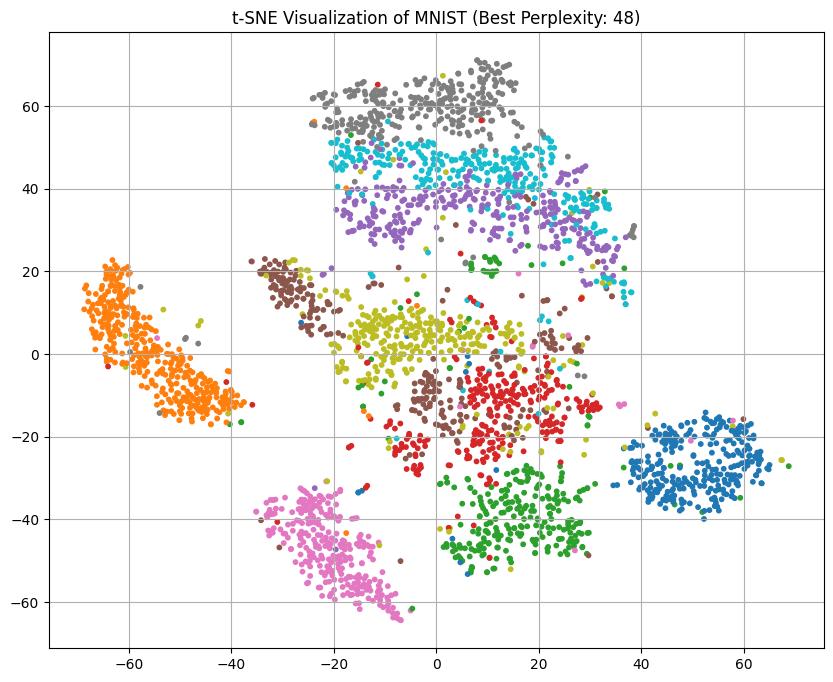

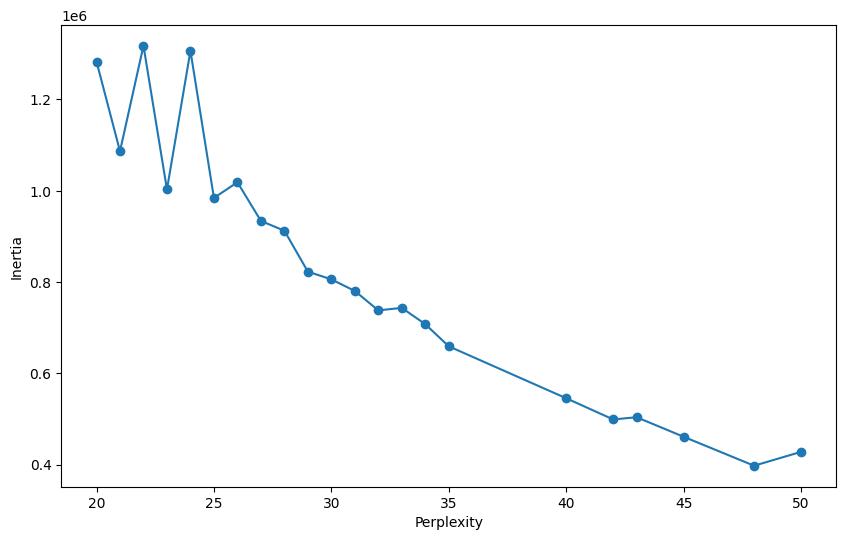

In [ ]:
print("#-----------------------------------------------------------------------------")
print(f"Best perplexity found: {best_perplexity}")

# Use the best perplexity for your final t-SNE visualization
model = TSNE(n_components = 2, perplexity=best_perplexity, random_state = 42, learning_rate = 1000, max_iter = 3000)
_X = model.fit_transform(X_pca)

plt.figure(figsize=(10, 8))
plt.scatter(_X[:, 0], _X[:, 1], c=colors[ys], s=10)
plt.title(f"t-SNE Visualization of MNIST (Best Perplexity: {best_perplexity})")
plt.grid(True)
plt.savefig('tsne_mnist_best.png')

print(f"The change of perplexity")
# Plot the change of interia and perplexity
plt.figure(figsize=(10, 6))
plt.plot(list(perplexity_score_list.keys()), list(perplexity_score_list.values()), marker='o')
plt.xlabel('Perplexity')
plt.ylabel('Inertia')
plt.savefig('inertia_perplexity.png')
plt.show()

# Summary

## Summary all source code

In [ ]:
# Summary all process and explained them

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
Xs = mnist.data
ys = mnist.target.astype(int)


# Standardize the data
scaler = StandardScaler()
_Xs = scaler.fit_transform(Xs)

# Screen data with PCA to improve speed calculation and help tSNE not hard working
pca = PCA(n_components = 30, random_state = 42)
X_pca = pca.fit_transform(_Xs)


colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Iterate through perplexity values and evaluate perplexity
best_perplexity = None
min_perplexity_score = float('inf')
perplexity_score_list = {}
perplexity_values = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 42, 43, 45, 48, 50]

for perplexity in perplexity_values:
    print(f"Trying perplexity: {perplexity}")
    model = TSNE(n_components = 2, perplexity = perplexity, random_state = 42, learning_rate = 1000, max_iter = 3000)
    _X = model.fit_transform(X_pca)

    # Evaluate perplexity with minimize kmeans.interia_
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(_X)
    perplexity_score = kmeans.inertia_

    if perplexity_score < min_perplexity_score:
        min_perplexity_score = perplexity_score
        best_perplexity = perplexity

    perplexity_score_list[perplexity] = perplexity_score
    plt.figure(figsize=(8, 6))
    plt.scatter(_X[:, 0], _X[:, 1], c=colors[ys], s=10)
    plt.title(f"t-SNE Visualization of MNIST (Perplexity: {perplexity})")
    plt.grid(True)
    plt.savefig(f'tsne_mnist_{perplexity}.png')
    plt.show()

print("#-----------------------------------------------------------------------------")
print(f"Best perplexity found: {best_perplexity}")

# Use the best perplexity for your final t-SNE visualization
model = TSNE(n_components = 2, perplexity=best_perplexity, random_state = 42, learning_rate = 1000, max_iter = 3000)
_X = model.fit_transform(X_pca)

plt.figure(figsize=(10, 8))
plt.scatter(_X[:, 0], _X[:, 1], c=colors[ys], s=10)
plt.title(f"t-SNE Visualization of MNIST (Best Perplexity: {best_perplexity})")
plt.grid(True)
plt.savefig('tsne_mnist_best.png')

print(f"The change of perplexity")
# Plot the change of interia and perplexity
plt.figure(figsize=(10, 6))
plt.plot(list(perplexity_score_list.keys()), list(perplexity_score_list.values()), marker='o')
plt.xlabel('Perplexity')
plt.ylabel('Inertia')
plt.savefig('inertia_perplexity.png')
plt.show()

## Conclusion

## t-SNE Visualization of MNIST with KMeans Evaluation

This notebook explores the use of t-SNE for visualizing the MNIST dataset and evaluates different perplexity values using KMeans clustering.

### Process Overview

1. **Data Loading and Preprocessing:**
   - The MNIST dataset is loaded using `fetch_openml`.
   - The data is standardized using `StandardScaler`.
   - **PCA Dimensionality Reduction:** PCA is applied to reduce the dimensionality of the data to 30 components to improve the speed of t-SNE computation and reduce the computational burden.

2. **t-SNE Parameter Tuning (Perplexity):**
   - A loop iterates through different perplexity values (defined in `perplexity_values`).
   - For each perplexity:
     - **t-SNE Transformation:** t-SNE is applied to the PCA-reduced data with the current perplexity, `learning_rate = 1000`, `max_iter = 3000`, and `random_state = 42`.
     - **KMeans Clustering:** KMeans clustering (with `n_clusters=10` and `random_state=42`) is performed on the t-SNE reduced data.
     - **Inertia Evaluation:** The KMeans inertia is calculated as a metric to evaluate the quality of the clustering for the given perplexity. Lower inertia generally indicates better clustering.
     - **Visualization:** A scatter plot is generated to visualize the t-SNE transformed data, colored by the true labels (digits 0-9).
   - The perplexity that results in the lowest KMeans inertia is chosen as the best perplexity.

3. **Final Visualization with Best Perplexity:**
   - Using the best perplexity found, t-SNE is applied again to the PCA reduced data.
   - The final visualization of the MNIST dataset in 2D space is created with the best perplexity.

4. **Analysis of Perplexity Impact:**
   - A plot shows the relationship between perplexity and the KMeans inertia.


### Hyperparameters

- **PCA:** `n_components = 30`, `random_state = 42`
- **t-SNE:** `n_components = 2`, `learning_rate = 1000`, `max_iter = 3000`, `random_state = 42`
- **Perplexity:** Iterated through `perplexity_values = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 42, 43, 45, 48, 50]`
- **KMeans:** `n_clusters = 10`, `random_state = 42`


### Results

The code produces the following outputs:

- **Scatter Plots:**  A series of scatter plots for each perplexity value, visualizing the 2D representation of the MNIST data after t-SNE transformation.
- **Best Perplexity:** The perplexity value that minimizes the KMeans inertia is reported as the best perplexity.
- **Final Visualization:** A scatter plot using the best perplexity showing the 2D representation of the MNIST data.
- **Perplexity vs. Inertia Plot:** A plot demonstrating how the KMeans inertia changes with different perplexity values.


### How to achieve beautiful results?

The good results are achieved by carefully tuning the t-SNE hyperparameters, specifically the perplexity. The perplexity parameter controls the local neighborhood size used by t-SNE. By iterating through different perplexity values and evaluating the resulting clustering quality with KMeans inertia, we are able to find a perplexity that optimally balances local and global structure in the data.

Furthermore, applying PCA for dimensionality reduction helps to significantly speed up the t-SNE process, especially for high-dimensional datasets like MNIST.

By utilizing the combination of PCA, t-SNE, and KMeans, we are able to obtain an effective and insightful visualization of the complex structure within the MNIST dataset.